Accuracy of SVM Model is 0.8419618528610354
Accuracy of Logistic Regression Model is 1.0


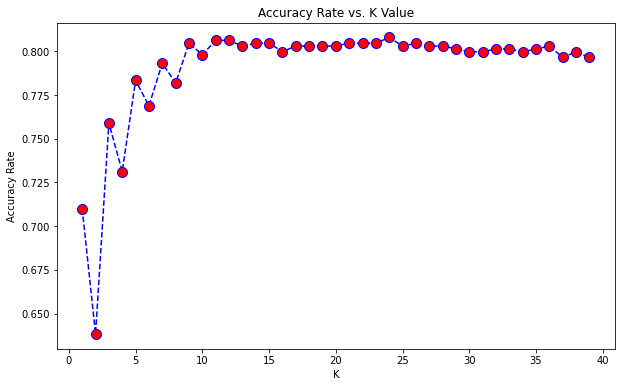

The above Graph shows that accuracy reamins constant for k>10
Below is the classification report for KNN Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.99      1.00       309

    accuracy                           0.99       367
   macro avg       0.98      1.00      0.98       367
weighted avg       0.99      0.99      0.99       367

Accuracy of KNN Model(with k=13) is 0.9918256130790191
Accuracy of Decision Tree Model is 0.7629427792915532
Accuracy of Random Forest Model is 0.9318801089918256


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv('https://raw.githubusercontent.com/ranjith1604/ML_project/master/project2/train_AV3.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/ranjith1604/ML_project/master/project2/test_AV3.csv')
df3=pd.concat([df,df2])
df3=df3.drop(columns=['Loan_ID'])
label_encoder = LabelEncoder()
original=df3['Gender']
mask=df3['Gender'].isnull()
df3['Gender']=label_encoder.fit_transform(df3['Gender'].astype(str))
df3['Gender'].where(~mask, original,inplace=True)
original=df3['Married']
mask=df3['Married'].isnull()
df3['Married']=label_encoder.fit_transform(df3['Married'].astype(str))
df3['Married'].where(~mask, original,inplace=True)
original=df3['Dependents']
mask=df3['Dependents'].isnull()
df3['Dependents']=label_encoder.fit_transform(df3['Dependents'].astype(str))
df3['Dependents'].where(~mask, original,inplace=True)
original=df3['Education']
mask=df3['Education'].isnull()
df3['Education']=label_encoder.fit_transform(df3['Education'].astype(str))
df3['Education'].where(~mask, original,inplace=True)
original=df3['Self_Employed']
mask=df3['Self_Employed'].isnull()
df3['Self_Employed']=label_encoder.fit_transform(df3['Self_Employed'].astype(str))
df3['Self_Employed'].where(~mask, original,inplace=True)
original=df3['Property_Area']
mask=df3['Property_Area'].isnull()
df3['Property_Area']=label_encoder.fit_transform(df3['Property_Area'].astype(str))
df3['Property_Area'].where(~mask, original,inplace=True)
original=df3['Loan_Status']
mask=df3['Loan_Status'].isnull()
df3['Loan_Status']=label_encoder.fit_transform(df3['Loan_Status'].astype(str))
df3['Loan_Status'].where(~mask, original,inplace=True)
df=df3.iloc[0:df.shape[0],:]
df2=df3.iloc[df.shape[0]:,:]
inval=df.drop(columns=['Loan_Status'])
out=df['Loan_Status']
inval['LoanAmount']=inval['LoanAmount'].replace(to_replace=np.nan,value=inval['LoanAmount'].mean())
count = inval['Gender'].value_counts()	
inval["Gender"].fillna(count[count==count.max()].index[0], inplace = True)  	
count = inval['Married'].value_counts()		
inval["Married"].fillna(count[count==count.max()].index[0], inplace = True)
count = inval['Dependents'].value_counts()		
inval["Dependents"].fillna(count[count==count.max()].index[0], inplace = True)
count = inval['Education'].value_counts()		
inval["Education"].fillna(count[count==count.max()].index[0], inplace = True)
count = inval['Loan_Amount_Term'].value_counts()		
inval['Loan_Amount_Term'].fillna(count[count==count.max()].index[0], inplace = True)
count = inval['Self_Employed'].value_counts()		
inval['Self_Employed'].fillna(count[count==count.max()].index[0], inplace = True)
count = inval['Credit_History'].value_counts()		
inval['Credit_History'].fillna(count[count==count.max()].index[0], inplace = True)
#print(inval.isnull().values.any())  #This tells if there are any NaN values in the dataframe
invaltest=df2.drop(columns=['Loan_Status'])
outtest=df2['Loan_Status']
invaltest['LoanAmount']=invaltest['LoanAmount'].replace(to_replace=np.nan,value=inval['LoanAmount'].mean())
count = invaltest['Gender'].value_counts()		
invaltest["Gender"].fillna(count[count==count.max()].index[0], inplace = True)  	
count = invaltest['Married'].value_counts()		
invaltest["Married"].fillna(count[count==count.max()].index[0], inplace = True)
count = invaltest['Dependents'].value_counts()		
invaltest["Dependents"].fillna(count[count==count.max()].index[0], inplace = True)
count = invaltest['Education'].value_counts()		
invaltest["Education"].fillna(count[count==count.max()].index[0], inplace = True)
count = invaltest['Loan_Amount_Term'].value_counts()		
invaltest['Loan_Amount_Term'].fillna(count[count==count.max()].index[0], inplace = True)
count = invaltest['Self_Employed'].value_counts()		
invaltest['Self_Employed'].fillna(count[count==count.max()].index[0], inplace = True)
count = invaltest['Credit_History'].value_counts()		
invaltest['Credit_History'].fillna(count[count==count.max()].index[0], inplace = True)
#print(inval.isnull().values.any())
model=SVC()
model.fit(inval,out)
print("Accuracy of SVM Model is",model.score(invaltest, outtest))
model = LogisticRegression(max_iter=200)  #The default max iteration value was not converging so increased max iter
model.fit(inval,out)
print("Accuracy of Logistic Regression Model is",model.score(invaltest, outtest))
scaler = StandardScaler()
scaler.fit(inval)
invalsc=scaler.transform(inval)
scaler.fit(invaltest)
invaltestsc=scaler.transform(invaltest)
accuracy_rate = []
for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,invalsc,out,cv=10)
    accuracy_rate.append(score.mean())
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()
#The graph shows k>10 to be an ideal value for k
print('The above Graph shows that accuracy reamins constant for k>10')
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(invalsc,out)
pred=knn.predict(invaltestsc)
print('Below is the classification report for KNN Model')
print(classification_report(outtest,pred))
print("Accuracy of KNN Model(with k=13) is",accuracy_score(outtest,pred.round()))
model = tree.DecisionTreeClassifier()
model.fit(inval,out)
print("Accuracy of Decision Tree Model is",model.score(invaltest,outtest))
regressor = RandomForestRegressor(n_estimators=20)
regressor.fit(inval,out)
pred = regressor.predict(invaltest)
print("Accuracy of Random Forest Model is",accuracy_score(outtest, pred.round()))